In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
!pip install newspaper3k

     |████████████████████████████████| 215kB 10.8MB/s 
     |████████████████████████████████| 194kB 24.5MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 7.4MB 20.7MB/s 
  Created wheel for feedparser: filename=feedparser-5.2.1-cp36-none-any.whl size=44940 sha256=1e5d1299928d904573e012d8a066b814fe3b477ae2d1b82dee0f799ab7278abd
  Stored in directory: /root/.cache/pip/wheels/8c/69/b7/f52763c41c5471df57703a0ef718a32a5e81ee35dcf6d4f97f
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-cp36-none-any.whl size=13539 sha256=2080781e7bde6f955dcb43786e6896f9e42de1f8bf2d34b50f3c7bda41902ddc
  Stored in directory: /root/.cache/pip/wheels/81/2b/43/a02ede72324dd40cdd7ca53aad718c7710628e91b8b0dc0f02
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp36-none-any.whl size=3357 sha256=0426e915564ca7830478c2f95854e0f584e14d9fa3aa0c052aba9e93f41ba80e
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7

In [0]:
import requests
from bs4 import BeautifulSoup
from newspaper import Article
import pandas as pd
import numpy as np

In [0]:
url = "https://timesofindia.indiatimes.com/world"
r = requests.get(url)

In [0]:
soup = BeautifulSoup(r.content, 'html5lib') 
table = soup.findAll('a', attrs = {'class':'w_img'})

In [0]:
news=[]
for row in table: 
    if not row['href'].startswith('http'):
        news.append('https://timesofindia.indiatimes.com'+row['href'])

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
df=[]
for i in news:
    article = Article(i, language="en")
    article.download() 
    article.parse() 
    article.nlp() 
    data={}
    data['Title']=article.title
    data['Text']=article.text
    data['Summary']=article.summary
    data['Keywords']=article.keywords
    df.append(data)

In [9]:
df_news=pd.DataFrame(df)
df_news.head()

,Title,Text,Summary,Keywords
0,France Lockdown Lift: France to outline plans ...,Nurse Sandrine poses as she works in a hotel o...,"Restaurants, cafes and cinemas will have to re...","[plans, told, outline, lockdown, number, lift,..."
1,Covid-19: Testing won't 'be a problem' for reo...,"Apr 28, 2020, 08:40AM IST\n\nSource: AP\n\nThe...","Apr 28, 2020, 08:40AM ISTSource: APThe White H...","[tests, unveiling, house, reopening, virus, tr..."
2,Covid-19: Some Georgia restaurants reopen for ...,"Apr 28, 2020, 08:43AM IST\n\nSource: AP\n\nWit...","Apr 28, 2020, 08:43AM ISTSource: APWith tables...","[service, customers, zink, dinein, allowed, wi..."
3,'Very good idea' on Kim Jong Un's health: Pres...,"Apr 28, 2020, 08:39AM IST\n\nSource: AP\n\nNor...","Apr 28, 2020, 08:39AM ISTSource: APNorth Korea...","[reporters, jong, good, donald, future, idea, ..."
4,Covid-19: Mayor entertains residents after imp...,"Apr 27, 2020, 08:27AM IST\n\nSource: AP\n\nThe...","Apr 27, 2020, 08:27AM ISTSource: APThe videos,...","[way, mayor, curfew, facebook, residents, comm..."


In [0]:
url_uci_data = 'https://raw.githubusercontent.com/dranzerblaze/news_virality/master/OnlineNewsPopularity.csv'
data_uci =pd.read_csv(url_uci_data)

In [11]:
data_uci.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [0]:
def clean_cols(data):
    clean_col_map = {x: x.lower().strip() for x in list(data)}
    return data.rename(index=str, columns=clean_col_map)

In [0]:
full_data = clean_cols(data_uci)

In [0]:
data = full_data.drop(['url', 'timedelta', 'lda_00','lda_01','lda_02','lda_03','lda_04','num_self_hrefs', 'kw_min_min', 'kw_max_min', 'kw_avg_min','kw_min_max','kw_max_max','kw_avg_max','kw_min_avg','kw_max_avg','kw_avg_avg','self_reference_min_shares','self_reference_max_shares','self_reference_avg_sharess','rate_positive_words','rate_negative_words','abs_title_subjectivity','abs_title_sentiment_polarity'], axis=1)

In [15]:
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.521617,0.092562,0.045662,0.013699,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.341246,0.148948,0.043137,0.015686,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.702222,0.323333,0.056872,0.009479,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.429850,0.100705,0.041431,0.020716,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.513502,0.281003,0.074627,0.012127,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,505


In [16]:
for i in range(len(data.columns)):
  print(i+1 ,data.columns[i])

1 n_tokens_title
2 n_tokens_content
3 n_unique_tokens
4 n_non_stop_words
5 n_non_stop_unique_tokens
6 num_hrefs
7 num_imgs
8 num_videos
9 average_token_length
10 num_keywords
11 data_channel_is_lifestyle
12 data_channel_is_entertainment
13 data_channel_is_bus
14 data_channel_is_socmed
15 data_channel_is_tech
16 data_channel_is_world
17 weekday_is_monday
18 weekday_is_tuesday
19 weekday_is_wednesday
20 weekday_is_thursday
21 weekday_is_friday
22 weekday_is_saturday
23 weekday_is_sunday
24 is_weekend
25 global_subjectivity
26 global_sentiment_polarity
27 global_rate_positive_words
28 global_rate_negative_words
29 avg_positive_polarity
30 min_positive_polarity
31 max_positive_polarity
32 avg_negative_polarity
33 min_negative_polarity
34 max_negative_polarity
35 title_subjectivity
36 title_sentiment_polarity
37 shares


In [17]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
values = data.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [0]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [20]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head(10)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var17(t-1),var18(t-1),var19(t-1),var20(t-1),var21(t-1),var22(t-1),var23(t-1),var24(t-1),var25(t-1),var26(t-1),var27(t-1),var28(t-1),var29(t-1),var30(t-1),var31(t-1),var32(t-1),var33(t-1),var34(t-1),var35(t-1),var36(t-1),var37(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t),var14(t),var15(t),var16(t),var17(t),var18(t),var19(t),var20(t),var21(t),var22(t),var23(t),var24(t),var25(t),var26(t),var27(t),var28(t),var29(t),var30(t),var31(t),var32(t),var33(t),var34(t),var35(t),var36(t),var37(t)
1,0.476190,0.025844,0.000947,0.00096,0.001254,0.013158,0.007812,0.000000,0.582024,0.444444,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.521617,0.433591,0.293670,0.074074,0.378636,0.100000,0.7,0.650000,0.400,0.800000,0.500000,0.406250,0.000702,0.333333,0.030092,0.000863,0.00096,0.001218,0.009868,0.007812,0.000000,0.611043,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.341246,0.483864,0.277432,0.084822,0.286915,0.033333,0.7,0.881250,0.875,0.900000,0.000000,0.500000,0.000842
2,0.333333,0.030092,0.000863,0.00096,0.001218,0.009868,0.007812,0.000000,0.611043,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.341246,0.483864,0.277432,0.084822,0.286915,0.033333,0.7,0.881250,0.875,0.900000,0.000000,0.500000,0.000842,0.333333,0.024900,0.000820,0.00096,0.001021,0.009868,0.007812,0.000000,0.546334,0.555556,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.702222,0.639345,0.365765,0.051255,0.495833,0.100000,1.0,0.533333,0.200,0.866667,0.000000,0.500000,0.001778
3,0.333333,0.024900,0.000820,0.00096,0.001021,0.009868,0.007812,0.000000,0.546334,0.555556,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.702222,0.639345,0.365765,0.051255,0.495833,0.100000,1.0,0.533333,0.200,0.866667,0.000000,0.500000,0.001778,0.333333,0.062662,0.000719,0.00096,0.001024,0.029605,0.007812,0.000000,0.547768,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.429850,0.440851,0.266460,0.112018,0.385965,0.136364,0.8,0.630303,0.400,0.833333,0.000000,0.500000,0.001422
4,0.333333,0.062662,0.000719,0.00096,0.001024,0.029605,0.007812,0.000000,0.547768,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.429850,0.440851,0.266460,0.112018,0.385965,0.136364,0.8,0.630303,0.400,0.833333,0.000000,0.500000,0.001422,0.523810,0.126505,0.000593,0.00096,0.000832,0.062500,0.156250,0.000000,0.582331,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.513502,0.601604,0.479953,0.065575,0.411127,0.033333,1.0,0.779808,0.500,0.950000,0.454545,0.568182,0.000598
5,0.523810,0.126505,0.000593,0.00096,0.000832,0.062500,0.156250,0.000000,0.582331,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.513502,0.601604,0.479953,0.065575,0.411127,0.033333,1.0,0.779808,0.500,0.950000,0.454545,0.568182,0.000598,0.380952,0.043663,0.000799,0.00096,0.001074,0.006579,0.000000,0.000000,0.542118,0.888889,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.437409,0.414531,0.191203,0.146146,0.350610,0.136364,0.6,0.805000,0.600,0.900000,0.642857,0.607143,0.001013
6,0.380952,0.043663,0.000799,0.00096,0.001074,0.006579,0.000000,0.000000,0.542118,0.888889,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.437409,0.414531,0.191203,0.146146,0.350610,0.136364,0.6,0.805000,0.600,0.900000,0.642857,0.607143,0.001013,0.285714,0.113288,0.000597,0.00096,0.000846,0.069079,0.156250,0.000000,0.578766,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.514480,0.590280,0.515850,0.090123,0.402039,0.100000,1.0,0.775521,0.500,0.950000,0.000000,0.500000,0.000658
7,0.285714,0.113288,0.000597,0.00096,0.000846,0.069079,0.156250,0.000000,0.578766,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.514480,0.590280,0.515850,0.090123,0.402039,0.100000,1.0,0.775521,0.5

In [21]:
reframed_new = reframed.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,73]]
reframed_new.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var17(t-1),var18(t-1),var19(t-1),var20(t-1),var21(t-1),var22(t-1),var23(t-1),var24(t-1),var25(t-1),var26(t-1),var27(t-1),var28(t-1),var29(t-1),var30(t-1),var31(t-1),var32(t-1),var33(t-1),var34(t-1),var35(t-1),var36(t-1),var37(t-1),var37(t)
1,0.476190,0.025844,0.000947,0.00096,0.001254,0.013158,0.007812,0.0,0.582024,0.444444,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.521617,0.433591,0.293670,0.074074,0.378636,0.100000,0.7,0.650000,0.400,0.800000,0.500000,0.406250,0.000702,0.000842
2,0.333333,0.030092,0.000863,0.00096,0.001218,0.009868,0.007812,0.0,0.611043,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.341246,0.483864,0.277432,0.084822,0.286915,0.033333,0.7,0.881250,0.875,0.900000,0.000000,0.500000,0.000842,0.001778
3,0.333333,0.024900,0.000820,0.00096,0.001021,0.009868,0.007812,0.0,0.546334,0.555556,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.702222,0.639345,0.365765,0.051255,0.495833,0.100000,1.0,0.533333,0.200,0.866667,0.000000,0.500000,0.001778,0.001422
4,0.333333,0.062662,0.000719,0.00096,0.001024,0.029605,0.007812,0.0,0.547768,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.429850,0.440851,0.266460,0.112018,0.385965,0.136364,0.8,0.630303,0.400,0.833333,0.000000,0.500000,0.001422,0.000598
5,0.523810,0.126505,0.000593,0.00096,0.000832,0.062500,0.156250,0.0,0.582331,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.513502,0.601604,0.479953,0.065575,0.411127,0.033333,1.0,0.779808,0.500,0.950000,0.454545,0.568182,0.000598,0.001013


In [22]:
values = reframed_new.values

n_train_time = 37000
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(37000, 1, 37) (37000,) (2643, 1, 37) (2643,)


In [23]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=10, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Train on 37000 samples, validate on 2643 samples
Epoch 1/10
 - 6s - loss: 4.3459e-04 - val_loss: 1.0566e-04
Epoch 2/10
 - 4s - loss: 2.1992e-04 - val_loss: 1.0206e-04
Epoch 3/10
 - 4s - loss: 2.0535e-04 - val_loss: 1.0116e-04
Epoch 4/10
 - 4s - loss: 2.0106e-04 - val_loss: 9.8757e-05
Epoch 5/10
 - 4s - loss: 1.9938e-04 - val_loss: 9.7326e-05
Epoch 6/10
 - 4s - loss: 1.9854e-04 - val_loss: 9.7091e-05
Epoch 7/10
 - 4s - loss: 1.9828e-04 - val_loss: 9.6815e-05
Epoch 8/10
 - 4s - loss: 1.9806e-04 - val_loss: 9.6796e-05
Epoch 9/10
 - 4s - loss: 1.9799e-04 - val_loss: 9.6797e-05
Epoch 10/10
 - 4s - loss: 1.9794e-04 - val_loss: 9.6764e-05


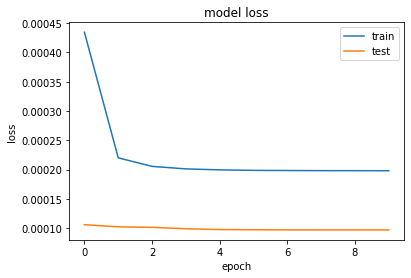

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [25]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 37))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat1 = inv_yhat.copy()
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y1 = inv_y.copy()
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.207


In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from textblob import TextBlob

stopwords=set(stopwords.words('english'))

def rate_unique(words):
    words=tokenize(words)
    no_order = list(set(words))
    rate_unique=len(no_order)/len(words)
    return rate_unique

def rate_nonstop(words):
    words=tokenize(words)
    filtered_sentence = [w for w in words if not w in stopwords]
    rate_nonstop=len(filtered_sentence)/len(words)
    no_order = list(set(filtered_sentence))
    rate_unique_nonstop=len(no_order)/len(words)
    return rate_nonstop,rate_unique_nonstop
  
def avg_token(words):
    words=tokenize(words)
    length=[]
    for i in words:
        length.append(len(i))
    return np.average(length)

def tokenize(text):
    text=text
    return word_tokenize(text)

In [29]:
!pip install datefinder

In [0]:
import datefinder
import datetime  
from datetime import date 
def day(article_text):
    article=article_text
    if len(list(datefinder.find_dates(article)))>0:
        date=str(list(datefinder.find_dates(article))[0])
        date=date.split()
        date=date[0]
        year, month, day = date.split('-')     
        day_name = datetime.date(int(year), int(month), int(day)) 
        return day_name.strftime("%A")
    return "Monday"

In [0]:
pos_words=[]
neg_words=[]
def polar(words):
    all_tokens=tokenize(words)
    for i in all_tokens:
        analysis=TextBlob(i)
        polarity=analysis.sentiment.polarity
        if polarity>0:
            pos_words.append(i)
        if polarity<0:
            neg_words.append(i)
    return pos_words,neg_words

In [0]:
def rates(words):
    words=polar(words)
    pos=words[0]
    neg=words[1]
    all_words=words
    global_rate_positive_words=(len(pos)/len(all_words))/100
    global_rate_negative_words=(len(neg)/len(all_words))/100
    pol_pos=[]
    pol_neg=[]
    for i in pos:
        analysis=TextBlob(i)
        pol_pos.append(analysis.sentiment.polarity)
        avg_positive_polarity=analysis.sentiment.polarity
    for j in neg:
        analysis2=TextBlob(j)
        pol_neg.append(analysis2.sentiment.polarity)
        avg_negative_polarity=analysis2.sentiment.polarity
    min_positive_polarity=min(pol_pos)
    max_positive_polarity=max(pol_pos)
    min_negative_polarity=min(pol_neg)
    max_negative_polarity=max(pol_neg)
    avg_positive_polarity=np.average(pol_pos)
    avg_negative_polarity=np.average(pol_neg)
    return global_rate_positive_words,global_rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity

In [0]:
df2=[]
for i in news:
    pred_info={}
    article = Article(i, language="en") # en for English 
    article.download() 
    article.parse()
    analysis=TextBlob(article.text)
    polarity=analysis.sentiment.polarity
    title_analysis=TextBlob(article.title)
    pred_info['text']=article.text
    pred_info['n_tokens_title']=len(tokenize(article.title))
    pred_info['n_tokens_content']=len(tokenize(article.text))
    pred_info['n_unique_tokens']=rate_unique(article.text)
    pred_info['n_non_stop_words']=rate_nonstop(article.text)[0]
    pred_info['n_non_stop_unique_tokens']=rate_nonstop(article.text)[1]
    pred_info['num_hrefs']=article.html.count("https://timesofindia.indiatimes.com")
    pred_info['num_imgs']=len(article.images)
    pred_info['num_videos']=len(article.movies)
    pred_info['average_token_length']=avg_token(article.text)
    pred_info['num_keywords']=len(article.keywords)
    
    if "life-style" in article.url:
        pred_info['data_channel_is_lifestyle']=1
    else:
        pred_info['data_channel_is_lifestyle']=0
    if "etimes" in article.url:
        pred_info['data_channel_is_entertainment']=1
    else:
        pred_info['data_channel_is_entertainment']=0
    if "business" in article.url:
        pred_info['data_channel_is_bus']=1
    else:
        pred_info['data_channel_is_bus']=0
    if "social media" or "facebook" or "whatsapp" in article.text.lower():
        data_channel_is_socmed=1
        data_channel_is_tech=0
        data_channel_is_world=0
    else:
        data_channel_is_socmed=0
    if ("technology" or "tech" in article.text.lower()) or ("technology" or "tech" in article.url):
        data_channel_is_tech=1
        data_channel_is_socmed=0
        data_channel_is_world=0
    else:
        data_channel_is_tech=0
    if "world" in article.url:
        data_channel_is_world=1
        data_channel_is_tech=0
        data_channel_is_socmed=0
    else:
        data_channel_is_world=0
        
    pred_info['data_channel_is_socmed']=data_channel_is_socmed
    pred_info['data_channel_is_tech']=data_channel_is_tech
    pred_info['data_channel_is_world']=data_channel_is_world
    
    if day(i)=="Monday":
        pred_info['weekday_is_monday']=1
    else:
        pred_info['weekday_is_monday']=0
    if day(i)=="Tuesday":
        pred_info['weekday_is_tuesday']=1
    else:
        pred_info['weekday_is_tuesday']=0
    if day(i)=="Wednesday":
        pred_info['weekday_is_wednesday']=1
    else:
        pred_info['weekday_is_wednesday']=0
    if day(i)=="Thursday":
        pred_info['weekday_is_thursday']=1
    else:
        pred_info['weekday_is_thursday']=0
    if day(i)=="Friday":
        pred_info['weekday_is_friday']=1
    else:
        pred_info['weekday_is_friday']=0
    if day(i)=="Saturday":
        pred_info['weekday_is_saturday']=1
        pred_info['is_weekend']=1
    else:
        pred_info['weekday_is_saturday']=0
    if day(i)=="Sunday":
        pred_info['weekday_is_sunday']=1
        pred_info['is_weekend']=1
    else:
        pred_info['weekday_is_sunday']=0
        pred_info['is_weekend']=0
        
    pred_info['global_subjectivity']=analysis.sentiment.subjectivity
    pred_info['global_sentiment_polarity']=analysis.sentiment.polarity
    pred_info['global_rate_positive_words']=rates(article.text)[0]
    pred_info['global_rate_negative_words']=rates(article.text)[1]
    pred_info['avg_positive_polarity']=rates(article.text)[2]
    pred_info['min_positive_polarity']=rates(article.text)[3]
    pred_info['max_positive_polarity']=rates(article.text)[4]
    pred_info['avg_negative_polarity']=rates(article.text)[5]
    pred_info['min_negative_polarity']=rates(article.text)[6]
    pred_info['max_negative_polarity']=rates(article.text)[7]    
    pred_info['title_subjectivity']=title_analysis.sentiment.subjectivity
    pred_info['title_sentiment_polarity']=title_analysis.sentiment.polarity
    df2.append(pred_info)

In [35]:

pred_df=pd.DataFrame(df2)
pred_test=pred_df.drop(['text'],axis=1)
pred_test.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity
0,12,559,0.583184,0.688730,0.508050,230,13,0,4.737030,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0.426497,0.122980,0.110,0.03,0.317643,0.033333,0.75,-0.566667,-1.0,-0.300000,0.00,0.00
1,15,152,0.736842,0.684211,0.539474,185,9,0,4.486842,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.342472,0.174148,0.920,0.14,0.327321,0.033333,0.75,-0.444444,-1.0,-0.100000,0.00,0.00
2,9,144,0.750000,0.708333,0.569444,185,9,0,4.472222,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.398452,0.010357,1.215,0.26,0.343759,0.033333,0.75,-0.323402,-1.0,-0.071429,0.00,0.00
3,14,181,0.662983,0.690608,0.491713,185,9,0,4.000000,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0.287167,0.074750,1.335,0.46,0.352916,0.033333,0.75,-0.302464,-1.0,-0.012500,0.78,0.91
4,8,190,0.594737,0.589474,0.431579,185,9,0,3.726316,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0.643750,0.300000,1.470,0.52,0.358811,0.033333,0.75,-0.300687,-1.0,-0.012500,0.00,0.00


In [36]:
pred_test.shape

(33, 36)

In [0]:
values = pred_test.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [38]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head(10)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var17(t-1),var18(t-1),var19(t-1),var20(t-1),var21(t-1),var22(t-1),var23(t-1),var24(t-1),var25(t-1),var26(t-1),var27(t-1),var28(t-1),var29(t-1),var30(t-1),var31(t-1),var32(t-1),var33(t-1),var34(t-1),var35(t-1),var36(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t),var14(t),var15(t),var16(t),var17(t),var18(t),var19(t),var20(t),var21(t),var22(t),var23(t),var24(t),var25(t),var26(t),var27(t),var28(t),var29(t),var30(t),var31(t),var32(t),var33(t),var34(t),var35(t),var36(t)
1,0.5,0.572216,0.326111,0.561863,0.445934,0.925,0.8,0.0,0.663829,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.519523,0.609335,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.18018,0.8,0.123484,0.714200,0.536281,0.565353,0.55,0.4,0.0,0.499507,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.391427,0.722257,0.069379,0.021912,0.227605,0.0,0.0,0.371522,0.0,0.695652,0.000000,0.18018
2,0.8,0.123484,0.714200,0.536281,0.565353,0.550,0.4,0.0,0.499507,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.391427,0.722257,0.069379,0.021912,0.227605,0.0,0.0,0.371522,0.0,0.695652,0.000000,0.18018,0.2,0.114664,0.747433,0.672834,0.679250,0.55,0.4,0.0,0.489905,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.476770,0.360788,0.094647,0.045817,0.614178,0.0,0.0,0.739457,0.0,0.795031,0.000000,0.18018
3,0.2,0.114664,0.747433,0.672834,0.679250,0.550,0.4,0.0,0.489905,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.476770,0.360788,0.094647,0.045817,0.614178,0.0,0.0,0.739457,0.0,0.795031,0.000000,0.18018,0.7,0.155458,0.527658,0.572494,0.383848,0.55,0.4,0.0,0.179753,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.307114,0.502897,0.104925,0.085657,0.829516,0.0,0.0,0.803103,0.0,1.000000,1.000000,1.00000
4,0.7,0.155458,0.527658,0.572494,0.383848,0.550,0.4,0.0,0.179753,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.307114,0.502897,0.104925,0.085657,0.829516,0.0,0.0,0.803103,0.0,1.000000,1.000000,1.00000,0.1,0.165380,0.355289,0.000000,0.155323,0.55,0.4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.850726,1.000000,0.116488,0.097610,0.968141,0.0,0.0,0.808506,0.0,1.000000,0.000000,0.18018
5,0.1,0.165380,0.355289,0.000000,0.155323,0.550,0.4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.850726,1.000000,0.116488,0.097610,0.968141,0.0,0.0,0.808506,0.0,1.000000,0.000000,0.18018,0.4,0.062845,0.806018,0.689855,0.787534,0.55,0.4,0.0,0.511535,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.502949,0.000000,0.134904,0.103586,1.000000,0.0,0.0,0.745278,0.0,1.000000,0.000000,0.18018
6,0.4,0.062845,0.806018,0.689855,0.787534,0.550,0.4,0.0,0.511535,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.502949,0.000000,0.134904,0.103586,1.000000,0.0,0.0,0.745278,0.0,1.000000,0.000000,0.18018,0.2,0.124587,0.404899,0.584963,0.353246,0.55,0.4,0.0,0.394391,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.400985,0.138758,0.123506,0.848026,0.0,0.0,0.745456,0.0,1.000000,0.512821,0.00000
7,0.2,0.124587,0.404899,0.584963,0.353246,0.550,0.4,0.0,0.394391,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.400985,0.138758,0.123506,0.848026,0.0,0.0,0.745456,0.0,1.000000,0.512821,0.00000,0.3,0.092613,0.625223,1.000000,0.813758,0.55,0.4,0.0,0.471072,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.683782,0.578349,0.147323,0.135458,0.690282,0.0,0.0,0.781550,0.0,1.000000,0.769231,0.48048
8,0.3,0.092613,0.625223,1.000000,0.813758,0.550,0.4,0.0,0.471072,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.683782,0.578349,0.147323,0.135458,0.690282,0.0,0.0,0.781550,0.0,1.000000,0.769231,0.48048,0.0,0.057332,0.884698,0.724108,0.828416,0.55,0.4,0.0,0.643791,0

In [39]:
reframed_new = reframed.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,71]]
reframed_new.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var17(t-1),var18(t-1),var19(t-1),var20(t-1),var21(t-1),var22(t-1),var23(t-1),var24(t-1),var25(t-1),var26(t-1),var27(t-1),var28(t-1),var29(t-1),var30(t-1),var31(t-1),var32(t-1),var33(t-1),var34(t-1),var35(t-1),var36(t-1),var1(t),var36(t)
1,0.5,0.572216,0.326111,0.561863,0.445934,0.925,0.8,0.0,0.663829,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.519523,0.609335,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.18018,0.8,0.18018
2,0.8,0.123484,0.714200,0.536281,0.565353,0.550,0.4,0.0,0.499507,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.391427,0.722257,0.069379,0.021912,0.227605,0.0,0.0,0.371522,0.0,0.695652,0.0,0.18018,0.2,0.18018
3,0.2,0.114664,0.747433,0.672834,0.679250,0.550,0.4,0.0,0.489905,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.476770,0.360788,0.094647,0.045817,0.614178,0.0,0.0,0.739457,0.0,0.795031,0.0,0.18018,0.7,1.00000
4,0.7,0.155458,0.527658,0.572494,0.383848,0.550,0.4,0.0,0.179753,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.307114,0.502897,0.104925,0.085657,0.829516,0.0,0.0,0.803103,0.0,1.000000,1.0,1.00000,0.1,0.18018
5,0.1,0.165380,0.355289,0.000000,0.155323,0.550,0.4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.850726,1.000000,0.116488,0.097610,0.968141,0.0,0.0,0.808506,0.0,1.000000,0.0,0.18018,0.4,0.18018


In [40]:
reframed_new.shape

(32, 38)

In [46]:
values = reframed_new.values

n_train_time = 1
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(1, 1, 37) (1,) (31, 1, 37) (31,)


In [0]:
yhat = model.predict(test_X)

In [48]:
print (yhat)

[[0.00378456]
 [0.00397364]
 [0.00383837]
 [0.00347877]
 [0.00397216]
 [0.00362537]
 [0.00425195]
 [0.00373361]
 [0.00401119]
 [0.00354054]
 [0.00393959]
 [0.00400514]
 [0.00396315]
 [0.00384229]
 [0.00370626]
 [0.00398897]
 [0.00409226]
 [0.00382684]
 [0.00399478]
 [0.00384593]
 [0.00403693]
 [0.00408124]
 [0.00395889]
 [0.00399081]
 [0.00375305]
 [0.00397825]
 [0.00417805]
 [0.00407219]
 [0.00421479]
 [0.00412629]
 [0.00406277]]
